<a href="https://colab.research.google.com/github/Jirtus-sanasam/MLP-Diabetes/blob/main/Diabetes4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step1: Import the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                            roc_auc_score, roc_curve, accuracy_score)
from imblearn.over_sampling import SMOTE
import shap
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Step2: Data Accusation
df = pd.read_csv("/content/diabetes_data2.csv")

In [ ]:
print(df.head().T)

                                0       1        2       3        4
Pregnancies                 6.000   1.000    8.000   1.000    0.000
Glucose                   148.000  85.000  183.000  89.000  137.000
BloodPressure              72.000  66.000   64.000  66.000   40.000
SkinThickness              35.000  29.000    0.000  23.000   35.000
Insulin                     0.000   0.000    0.000  94.000  168.000
BMI                        33.600  26.600   23.300  28.100   43.100
DiabetesPedigreeFunction    0.627   0.351    0.672   0.167    2.288
Age                        50.000  31.000   32.000  21.000   33.000
Outcome                     1.000   0.000    1.000   0.000    1.000


In [ ]:
# Step3: Separating Independent and Dependent Variables
X = df.drop("Outcome", axis=1)
Y = df["Outcome"]

In [ ]:
print(X.head().T)
print(Y.head().T)
print(X.shape)
print(Y.shape)

                                0       1        2       3        4
Pregnancies                 6.000   1.000    8.000   1.000    0.000
Glucose                   148.000  85.000  183.000  89.000  137.000
BloodPressure              72.000  66.000   64.000  66.000   40.000
SkinThickness              35.000  29.000    0.000  23.000   35.000
Insulin                     0.000   0.000    0.000  94.000  168.000
BMI                        33.600  26.600   23.300  28.100   43.100
DiabetesPedigreeFunction    0.627   0.351    0.672   0.167    2.288
Age                        50.000  31.000   32.000  21.000   33.000
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64
(768, 8)
(768,)


In [ ]:
# Step4: Split the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Step5: Seperating slected features
selected_features = ['DiabetesPedigreeFunction', 'Glucose', 'BloodPressure', 'Age', 'BMI']

# Keep only those features in your training and test sets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(X_test_selected.head().T)

                            668      324      624      690     473
DiabetesPedigreeFunction   0.43    0.148    0.158    0.856    0.21
Glucose                   98.00  112.000  108.000  107.000  136.00
BloodPressure             58.00   75.000   64.000   80.000   90.00
Age                       43.00   21.000   21.000   34.000   50.00
BMI                       34.00   35.700   30.800   24.600   29.90


In [ ]:
# Step6:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)
print((X_train_selected).T)

                             60       618      346      294      231      340  \
DiabetesPedigreeFunction   0.304    1.282    0.654    0.254    0.238    0.472   
Glucose                   84.000  112.000  139.000  161.000  134.000  130.000   
BloodPressure              0.000   82.000   46.000   50.000   80.000   70.000   
Age                       21.000   50.000   22.000   65.000   46.000   22.000   
BMI                        0.000   28.200   28.700   21.900   46.200   25.900   

                              535      306      718     90   ...     466  \
DiabetesPedigreeFunction    0.302    0.326    0.415   0.258  ...   0.269   
Glucose                   132.000  161.000  108.000  80.000  ...  74.000   
BloodPressure               0.000   68.000   60.000  55.000  ...  52.000   
Age                        23.000   47.000   24.000  21.000  ...  22.000   
BMI                        32.900   25.500   35.500  19.100  ...  27.800   

                             121      614      20       

In [ ]:
# Convert scaled numpy array back to DataFrame for easier view
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_selected.columns)
print(X_train_scaled_df.T)


                               0         1         2         3         4    \
DiabetesPedigreeFunction -0.490735  2.415030  0.549161 -0.639291 -0.686829   
Glucose                  -1.151398 -0.276643  0.566871  1.254179  0.410665   
BloodPressure            -3.752683  0.680345 -1.265862 -1.049617  0.572222   
Age                      -1.035940  1.487101 -0.948939  2.792122  1.139095   
BMI                      -4.135256 -0.489169 -0.424522 -1.303720  1.838121   

                               5         6         7         8         9    \
DiabetesPedigreeFunction  0.008415 -0.496677 -0.425370 -0.160939 -0.627407   
Glucose                   0.285700  0.348182  1.254179 -0.401608 -1.276363   
BloodPressure             0.031609 -3.752683 -0.076513 -0.509004 -0.779311   
Age                      -0.948939 -0.861938  1.226097 -0.774936 -1.035940   
BMI                      -0.786545  0.118512 -0.838262  0.454676 -1.665743   

                          ...       604       605       606   

In [ ]:
# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, Y_train)


In [ ]:
print("Before SMOTE:", np.bincount(Y_train))
print("After SMOTE:", np.bincount(y_train_balanced))

Before SMOTE: [401 213]
After SMOTE: [401 401]


In [ ]:
# Check the shape of the balanced training data
print("X_train_balanced shape:", X_train_balanced.shape)
print("y_train_balanced shape:", y_train_balanced.shape)


X_train_res shape: (802, 5)
Y_train_res shape: (802,)


In [ ]:
# 8.2 Define the MLP classifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),   # two hidden layers: 100 and 50 neurons
    activation='relu',
    solver='adam',
    alpha=0.0001,                   # L2 penalty (regularization)
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42,
    early_stopping=True,            # stop if no improvement
    validation_fraction=0.1,         # portion of training set for validation during early stopping
    n_iter_no_change=20
)

In [ ]:
# 8.3 Train the model
mlp.fit(X_train_balanced, y_train_balanced)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50),
              learning_rate='adaptive', max_iter=500, n_iter_no_change=20,
              random_state=42)

In [ ]:
# 8.4 Predictions on test set
y_pred = mlp.predict(X_test_selected)
y_pred_proba = mlp.predict_proba(X_test_selected)[:, 1]

Accuracy: 0.35714285714285715
ROC AUC: 0.5212121212121212

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.36      1.00      0.53        55

    accuracy                           0.36       154
   macro avg       0.18      0.50      0.26       154
weighted avg       0.13      0.36      0.19       154


Confusion Matrix:
 [[ 0 99]
 [ 0 55]]


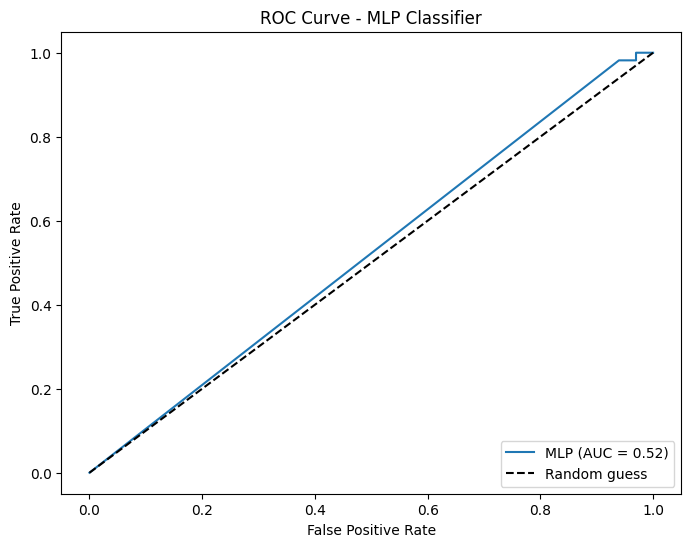

In [ ]:
# 8.5 Evaluation
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("ROC AUC:", roc_auc_score(Y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))

# 8.6 Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"MLP (AUC = {roc_auc_score(Y_test, y_pred_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MLP Classifier")
plt.legend(loc="lower right")
plt.show()